In [1]:
import numpy as np
import pandas as pd
from astropy.cosmology import FlatLambdaCDM

In [2]:
from snsims import SersicSamples
import snsims
from joinSNCat import HostingSN

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
print(snsims.__version__)

1.2.11


### DC2 Parameters

In [5]:
DC2 = FlatLambdaCDM(H0=71, Om0=0.265, Ob0=0.0448)

### uDDF Survey Area

In [27]:
#galaxy file name (contains galaxies with data from the rotated reference catalog and the gcr)
galfilename = '/Users/rbiswas/data/LSST/DC2/protoDC2_rotated_combined.hdf'
galsdf = pd.read_hdf(galfilename).query('raJ2000 < 53.76 and raJ2000 > 52.48 and decJ2000 > -28.667 and decJ2000 < -27.25 ')

In [28]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1),
                             alpha=2.6e-5,
                             fieldArea=9.6/6.0,
                             surveyDuration=10.,
                             cosmo=DC2,
                             zbinEdges=np.arange(0.001, 1.4, 0.02))

In [29]:
zdist.zSamples.size

4468

In [30]:
snPop = snsims.GMM_SALT2Params(numSN=None, zSamples=zdist.zSamples, rng=np.random.RandomState(2),
                               mjdmin=59580, cosmo=DC2, surveyDuration=10.)

In [31]:
sn = HostingSN(galsdf, snPop, surveyCenter=(53.125, -28.1), surveyWidth=1.15)

/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['snra'] = ra
/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['sndec'] = dec


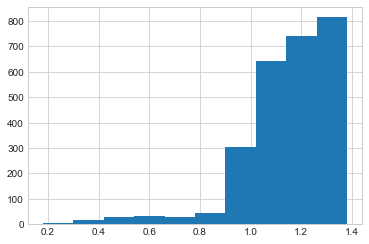

In [32]:
sn.hostless_snparams.z.hist()

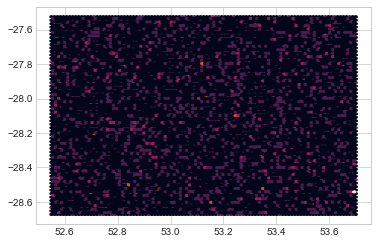

In [33]:
fig, ax = plt.subplots()
ax.hexbin(sn.hostless_snparams.snra, sn.hostless_snparams.sndec)

### Hosted Galaxies

In [34]:
mapper, tab = sn.assignHosts()

/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.z // binwidth
/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.zbin.astype(np.int)
/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Index(['snid'], dtype='object')


In [35]:
t = sn.get_positions(tab, np.random.RandomState(3))

In [36]:
t.snra.describe()

count    1808.000000
mean       53.463878
std         0.171990
min        53.154672
25%        53.311131
50%        53.461954
75%        53.612597
max        53.759900
Name: snra, dtype: float64

In [37]:
t.sndec.describe()

count    1808.000000
mean      -27.923504
std         0.411742
min       -28.665512
25%       -28.271484
50%       -27.906083
75%       -27.562002
max       -27.250075
Name: sndec, dtype: float64

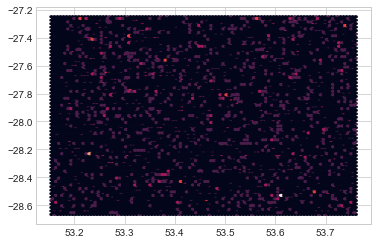

In [38]:
fig, ax = plt.subplots()
ax.hexbin(t.snra, t.sndec)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   3.,   1.,   0.,
          0.,   1.,   0.,   0.,   2.,   2.,   5.,   2.,   0.,   2.,   2.,
          1.,   1.,   3.,   1.,   4.,   2.,   3.,   5.,   2.,   3.,   0.,
          2.,   4.,   6.,   0.,   4.,   2.,   4.,   1.,   4.,   3.,   1.,
          1.,   5.,   1.,   4.,   3.,   6.,   2.,   2.,   2.,   1.,   1.,
          2.,   2.,   1.,   3.,   5.,   5.,   4.,   4.,   4.,   4.,   2.,
          5.,   4.,   6.,  10.,   5.,   5.,   8.,   7.,  42.,  59.,  39.,
         42.,  46.,  34.,  53.,  45.,  55.,  56.,  56.,  56.,  52.,  54.,
         58.,  47.,  52.,  55.,  70.,  54.,  54.,  60.,  58.,  51.,  64.,
         66.,  70.,  62.,  64.,  69.,  61.,  79.,  56.,  62.,  75.,  63.,
         77.,  70.,  85.,  57.,  65.,  66.,   5.]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.

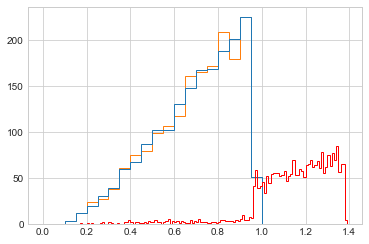

In [45]:
fig, ax = plt.subplots()
_ = ax.hist(t.z.values, bins=np.arange(0., 1.4,0.05), histtype='step')
ax.hist(sn.hostless_snparams.z, bins=np.arange(0., 1.4,0.01), color='r', histtype='step')

In [48]:
sn._hostlessSN.z.size

2660

In [49]:
sn._hostedParams

In [44]:
t.columns

Index(['c', 'mB', 't0', 'x0', 'x1', 'z', 'rand_host', 'zbin',
       'diskMassStellar', 'morphology/diskHalfLightRadiusArcsec',
       'morphology/diskMinorAxisArcsec', 'morphology/positionAngle',
       'morphology/spheroidHalfLightRadiusArcsec',
       'morphology/spheroidMinorAxisArcsec', 'size_bulge_true',
       'size_disk_true', 'totalMassStellar', 'uniqueId', 'raJ2000_gal',
       'decJ2000_gal', 'z', 'zbin_gals', 'rand_SM', 'diskmassratio', 'inDisk',
       'diskAngle', 'bulgeAngle', 'diskRadius', 'bulgeRadius', 'theta',
       'radial', 'deltaRA', 'deltaDec', 'snra', 'sndec'],
      dtype='object')